In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

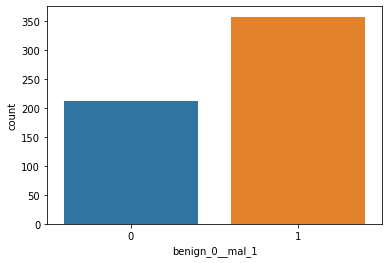

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

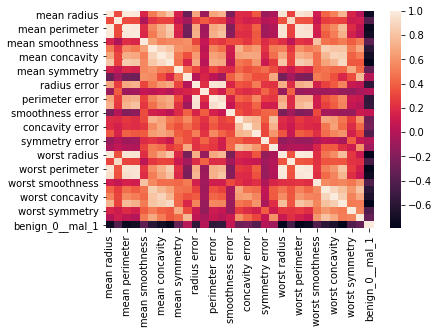

In [7]:
sns.heatmap(df.corr())

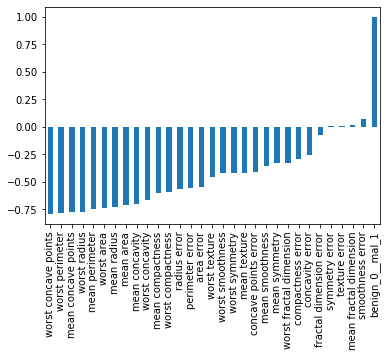

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [17]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping


In [20]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [22]:
model.fit(X_train,y_train,
          epochs=600,validation_data=(X_test,y_test),
          verbose=1,
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6724 - val_loss: 0.6615
Epoch 2/600
426/426 [==============================] - 0s 201us/sample - loss: 0.6455 - val_loss: 0.6354
Epoch 3/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6174 - val_loss: 0.6029
Epoch 4/600
426/426 [==============================] - 0s 194us/sample - loss: 0.5821 - val_loss: 0.5650
Epoch 5/600
426/426 [==============================] - 0s 170us/sample - loss: 0.5414 - val_loss: 0.5178
Epoch 6/600
426/426 [==============================] - 0s 169us/sample - loss: 0.4930 - val_loss: 0.4622
Epoch 7/600
426/426 [==============================] - 0s 166us/sample - loss: 0.4410 - val_loss: 0.4090
Epoch 8/600
426/426 [==============================] - 0s 227us/sample - loss: 0.3917 - val_loss: 0.3610
Epoch 9/600
426/426 [==============================] - 0s 158us/sample - loss: 0.3515 - val_loss: 0.3208
Epoch 10/60

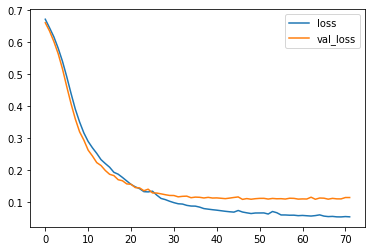

In [26]:
loss =pd.DataFrame(model.history.history)
loss.plot()

In [27]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7617 - val_loss: 0.6965
Epoch 2/600
426/426 [==============================] - 0s 158us/sample - loss: 0.7207 - val_loss: 0.6838
Epoch 3/600
426/426 [==============================] - 0s 131us/sample - loss: 0.7157 - val_loss: 0.6773
Epoch 4/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6826 - val_loss: 0.6714
Epoch 5/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6794 - val_loss: 0.6648
Epoch 6/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6662 - val_loss: 0.6561
Epoch 7/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6496 - val_loss: 0.6459
Epoch 8/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6345 - val_loss: 0.6266
Epoch 9/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6296 - val_loss: 0.6002
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1402 - val_loss: 0.0995
Epoch 79/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1481 - val_loss: 0.1097
Epoch 80/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1543 - val_loss: 0.1000
Epoch 81/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1582 - val_loss: 0.1088
Epoch 82/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1501 - val_loss: 0.1113
Epoch 83/600
426/426 [==============================] - 0s 169us/sample - loss: 0.1421 - val_loss: 0.0994
Epoch 84/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1577 - val_loss: 0.0978
Epoch 85/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1346 - val_loss: 0.1002
Epoch 86/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1721 - val_loss: 0.0981
Epoch 87/600
426/426 [========================

426/426 [==============================] - 0s 136us/sample - loss: 0.1015 - val_loss: 0.0948
Epoch 155/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0996 - val_loss: 0.1081
Epoch 156/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1002 - val_loss: 0.1056
Epoch 157/600
426/426 [==============================] - 0s 137us/sample - loss: 0.1062 - val_loss: 0.0892
Epoch 158/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0946 - val_loss: 0.0986
Epoch 159/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0978 - val_loss: 0.1006
Epoch 160/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0901 - val_loss: 0.0885
Epoch 161/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0865 - val_loss: 0.0890
Epoch 162/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0974 - val_loss: 0.0922
Epoch 163/600
426/426 [============================

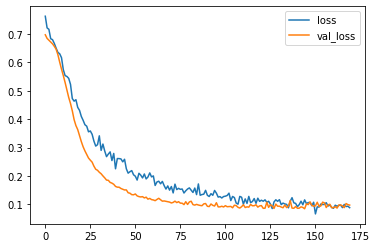

In [30]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [31]:
predictions = model.predict_classes(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [35]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
